# Example Notebook for one classifier

## 1. libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

from sam_ml.models import RFC
from sam_ml.data import Embeddings_builder, Sampler, Scaler, Selector
from sam_ml.models.scorer import s_scoring

## 2. data

### 2.1. load dataset

In [2]:
df = load_iris()
y = pd.Series(df.target)
X = pd.DataFrame(df.data, columns=df.feature_names)
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.80, random_state=42)

### 2.2. build embeddings [not needed for iris dataset]

In [ ]:
'''
eb = Embeddings_builder(vec="tfidf")
x_train_pre = eb.vectorize(x_train["string_columns"], train_on=True)
x_test_pre = eb.vectorize(x_test["string_columns"], train_on=False)
'''

### 2.3. scaling

In [3]:
scaler = Scaler(scaler="minmax")
x_train =scaler.scale(x_train, train_on=True)
x_test =scaler.scale(x_test, train_on=False)

using MinMaxScaler as scaler
starting to scale...
... data scaled
starting to scale...
... data scaled


### 2.4. feature selection

In [4]:
print("all features: ", list(x_train.columns))
selector = Selector(algorithm="kbest", num_features=3)
x_train = selector.select(x_train, y_train, train_on = True)
x_test = selector.select(x_test, train_on = False)
print("selected features: ", selector.selected_features)

all features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
starting to select features...
... features selected
starting to select features...
... features selected
selected features:  ['sepal length (cm)' 'petal length (cm)' 'petal width (cm)']


### 2.5. upsample data

In [5]:
print("Value counts before upsampling:")
y_train.value_counts()

Value counts before upsampling:


1    41
0    40
2    39
dtype: int64

In [6]:
sampler = Sampler(algorithm="ros")
x_train, y_train = sampler.sample(x_train, y_train)

In [7]:
print("Value counts after upsampling:")
y_train.value_counts()

Value counts after upsampling:


0    41
1    41
2    41
dtype: int64

## 3. model

The following class methods apply to all models in sam_ml.models. Here as an example the RandomForestClassifier.

### 3.1. simple training

In [8]:
model = RFC()
model.train(x_train, y_train)
model.evaluate(x_test, y_test)

Train score:  1.0  - Train time:  0:00:00
accuracy:  1.0
precision:  [1. 1. 1.]
recall:  [1. 1. 1.]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



{'accuracy': 1.0,
 'precision': array([1., 1., 1.]),
 'recall': array([1., 1., 1.]),
 's_score': 0.9926004570086354,
 'l_score': 1.0}

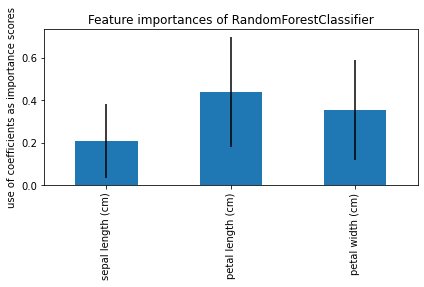

In [9]:
model.feature_importance()

### 3.2. hyperparameter tuning

#### 3.2.1. recall optimization (with recall_score function)

In [10]:
model.gridsearch(x_train, y_train, scoring="recall", avg="macro", train_afterwards=True)
model.evaluate(x_test, y_test, avg="macro")

grid:  {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 15], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


mean: 0.939444 (stdev: 0.062135) with: {'n_estimators': 16, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'criterion': 'entropy', 'bootstrap': True}
mean: 0.940556 (stdev: 0.061114) with: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 4, 'criterion': 'entropy', 'bootstrap': True}
mean: 0.921111 (stdev: 0.085411) with: {'n_estimators': 1, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}
mean: 0.932778 (stdev: 0.056680) with: {'n_estimators': 4, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 2, 'criterion': 'gini', 'bootstrap': False}
mean: 0.943333 (stdev: 0.055544) with: {'n_estimators': 200, 'min_samples_split': 2, 'min_samp

{'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 's_score': 0.9926004570086354,
 'l_score': 1.0}

#### 3.2.2. recall optimization (with s_scoring function)

In [11]:
model.gridsearch(x_train, y_train, scoring="s_score", train_afterwards=True, secondary_scoring="recall", pos_label=-1, strength=4)
model.evaluate(x_test, y_test, avg="macro", secondary_scoring="recall", pos_label=-1, strength=4)

grid:  {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 15], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


mean: 0.845324 (stdev: 0.253338) with: {'n_estimators': 16, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'criterion': 'entropy', 'bootstrap': True}
mean: 0.866586 (stdev: 0.196769) with: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 4, 'criterion': 'entropy', 'bootstrap': True}
mean: 0.803142 (stdev: 0.276230) with: {'n_estimators': 1, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}
mean: 0.825087 (stdev: 0.255991) with: {'n_estimators': 4, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 2, 'criterion': 'gini', 'bootstrap': False}
mean: 0.888033 (stdev: 0.151158) with: {'n_estimators': 200, 'min_samples_split': 2, 'min_samp

{'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 's_score': 0.9816036781135836,
 'l_score': 1.0}

### 3.3. crossvalidation

#### 3.3.1. small dataset crossvalidation

**Concept:**

The model will be trained on all datapoints except one and then tested on this last one. This will be repeated for all datapoints so that we have our predictions for all datapoints.

**Advantage:** optimal use of information for training

**Disadvantage:** long train time

This concept is very useful for small datasets (datapoints < 150) because the long train time is still not too long and especially with a small amount of information for the model, it is importatnt to use all the information one has for the training.

**method includes:**
- auto string column detection and vectorizing (*vectorizer parameter*)
- upsampling (*sampling parameter*)
- scaling (*scaler parameter*)

In [12]:
model.cross_validation_small_data(X, y, sampling="SMOTE", scaler="standard", avg="macro")

RandomForestClassifier: 100%|██████████| 150/150 [00:06<00:00, 23.04it/s]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



{'accuracy': 0.9666666666666667,
 'precision': 0.9667867146858743,
 'recall': 0.9666666666666667,
 's_score': 0.9885291351907307,
 'l_score': 0.9999999880691252,
 'avg train score': 0.9778666666666667,
 'avg train time': '0:00:00'}

#### 3.3.2. multiple split crossvalidation

In [13]:
model.cross_validation(X, y, cv_num=5, avg="macro", console_out=False)

,0,1,2,3,4,average
fit_time,0.041097,0.040601,0.041358,0.040870,0.044655,0.041716
score_time,0.012171,0.010377,0.012072,0.011044,0.007252,0.010583
test_precision (macro),0.969697,0.969697,0.944444,0.969697,1.000000,0.970707
train_precision (macro),0.967419,0.976744,0.991870,0.984127,0.967419,0.977516
test_recall (macro),0.966667,0.966667,0.933333,0.966667,1.000000,0.966667
train_recall (macro),0.966667,0.975000,0.991667,0.983333,0.966667,0.976667
test_accuracy,0.966667,0.966667,0.933333,0.966667,1.000000,0.966667
train_accuracy,0.966667,0.975000,0.991667,0.983333,0.966667,0.976667
test_s_score,0.987355,0.987355,0.972870,0.987355,0.992600,0.985507
train_s_score,0.988276,0.989213,0.991755,0.990650,0.988276,0.989634
